<a href="https://colab.research.google.com/github/helghand1/MAT421/blob/main/Module_D_Linear_Algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hussein ElGhandour

## MAT 421

## Module D: Linear Algebra

## Linear Space

### Introduction

A linear space (or vector space) consists of a set of vectors that can be added together and scaled by real or complex numbers while satisfying specific mathematical properties. These properties include closure under addition and scalar multiplication, associativity, commutativity, the existence of a zero vector, and the presence of additive inverses. A fundamental aspect of linear spaces is linear independence, where a set of vectors is independent if no vector in the set can be written as a linear combination of the others. A basis is a set of linearly independent vectors that span the entire space, allowing any vector in the space to be expressed as a combination of these basis vectors. The number of basis vectors defines the dimension of the space, such as $R^3$, which has three basis vectors. Another key concept is subspaces, which are subsets of a vector space that maintain vector space properties under the same operations. The span of a set of vectors includes all possible linear combinations of those vectors, determining whether they fully describe a given space. Additionally, the null space of a matrix consists of all vectors that satisfy $Ax=0$, while the column space contains all linear combinations of a matrix’s columns. These fundamental concepts are essential for solving systems of linear equations, performing transformations, and analyzing vector operations in higher-dimensional spaces. The next step involves applying these ideas through problem-solving and Python implementations.

In [3]:
import numpy as np
from scipy.linalg import null_space

# Define two vectors in R^2
v1 = np.array([2, 3])
v2 = np.array([-1, 4])

# Vector addition (closure property)
v_sum = v1 + v2

# Scalar multiplication (closure property)
scalar = 3
v_scaled = scalar * v1

# Check if vectors are linearly independent
A = np.column_stack((v1, v2))  # Create a matrix with v1 and v2 as columns
rank = np.linalg.matrix_rank(A)
is_independent = rank == A.shape[1]  # True if rank equals number of columns

# Span example: Creating a new vector from a linear combination of v1 and v2
c1, c2 = 2, -1  # Example scalar coefficients
span_vector = c1 * v1 + c2 * v2

# Compute the null space of a matrix
M = np.array([[2, 4], [1, 2]])  # Example matrix with a nontrivial null space
null_space_vectors = null_space(M)

# Display results
print("Vector 1:", v1)
print("Vector 2:", v2)
print("Vector Sum (v1 + v2):", v_sum)
print("Scaled Vector (3 * v1):", v_scaled)
print("Are v1 and v2 linearly independent?", is_independent)
print("Span Vector (2*v1 - 1*v2):", span_vector)
print("Null Space of M:\n", null_space_vectors)


Vector 1: [2 3]
Vector 2: [-1  4]
Vector Sum (v1 + v2): [1 7]
Scaled Vector (3 * v1): [6 9]
Are v1 and v2 linearly independent? True
Span Vector (2*v1 - 1*v2): [5 2]
Null Space of M:
 [[-0.89442719]
 [ 0.4472136 ]]


## Orthogonality

### Introduction

Orthogonality is a fundamental concept in linear algebra that describes the perpendicularity of vectors in a vector space. Two vectors are orthogonal if their dot product is zero, meaning they form a 90-degree angle. This property is crucial in many applications, including solving linear systems, optimizing least squares problems, and performing dimensionality reduction. A set of vectors is called orthonormal if the vectors are both orthogonal and have unit length (norm equal to 1). Orthonormal bases, such as those obtained through the Gram-Schmidt process, provide a convenient way to simplify computations, particularly in transformations and projections. One of the most important uses of orthogonality is in projections, where a vector is projected onto another vector or subspace to find its closest approximation within that space. The concept also plays a key role in orthogonal matrices, which have columns that form an orthonormal basis and satisfy the property $Q^TQ=I$, making them useful in numerical stability and preserving vector norms during transformations. These principles are widely used in numerical methods, particularly in QR decomposition, least squares regression, and principal component analysis. The next step involves demonstrating these ideas through problem-solving and Python implementation.

In [4]:
import numpy as np

# Define two vectors
v1 = np.array([1, -1, 2])
v2 = np.array([2, 2, -4])

# Check orthogonality using the dot product
dot_product = np.dot(v1, v2)
is_orthogonal = np.isclose(dot_product, 0)

# Normalize the vectors to create an orthonormal set
v1_norm = v1 / np.linalg.norm(v1)
v2_norm = v2 / np.linalg.norm(v2)

# Compute the projection of v1 onto v2
projection_v1_on_v2 = (np.dot(v1, v2) / np.dot(v2, v2)) * v2

# Display results
print("Vector 1:", v1)
print("Vector 2:", v2)
print("Dot Product (v1 · v2):", dot_product)
print("Are the vectors orthogonal?", is_orthogonal)
print("Normalized Vector 1:", v1_norm)
print("Normalized Vector 2:", v2_norm)
print("Projection of v1 onto v2:", projection_v1_on_v2)


Vector 1: [ 1 -1  2]
Vector 2: [ 2  2 -4]
Dot Product (v1 · v2): -8
Are the vectors orthogonal? False
Normalized Vector 1: [ 0.40824829 -0.40824829  0.81649658]
Normalized Vector 2: [ 0.40824829  0.40824829 -0.81649658]
Projection of v1 onto v2: [-0.66666667 -0.66666667  1.33333333]


## Eigenvalues

### Introduction

An eigenvalue is a scalar that characterizes how a transformation matrix stretches or compresses a vector in a given direction. Given a square matrix $A$, an eigenvalue $λ$ and its associated eigenvector $v$ satisfy the equation:

$$
Av=λv
$$

where $v$ is a nonzero vector. Eigenvalues and eigenvectors are fundamental in understanding matrix transformations, stability analysis, and dimensionality reduction. They play a critical role in solving systems of differential equations, optimizing computational methods, and decomposing matrices in applications such as Principal Component Analysis (PCA) and Markov processes.

The eigenvalues of a matrix are found by solving the characteristic equation, obtained by setting the determinant of $A−λI$ to zero:

$$
det(A−λI)=0
$$

where $I$ is the identity matrix. The corresponding eigenvectors are determined by solving the resulting system of linear equations. In numerical methods, iterative approaches such as the Power Method and QR Algorithm are used to approximate eigenvalues for large matrices efficiently.

A matrix with distinct eigenvalues has linearly independent eigenvectors, which can form a basis for diagonalization. This means that a matrix $A$ can be decomposed as $A=PDP^{−1}$, where $D$ is a diagonal matrix of eigenvalues and $P$ contains the eigenvectors as columns. In special cases, symmetric matrices always have real eigenvalues and orthogonal eigenvectors, making them particularly useful in numerical stability.

Eigenvalues and eigenvectors provide deep insight into how a matrix behaves under transformations, making them essential in physics, engineering, and machine learning. The next step involves applying these concepts through manual calculations and Python implementation.

In [6]:
import numpy as np

# Define a square matrix A
A = np.array([[4, -2],
              [1, 1]])

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

# Verify the eigenvalue equation Av = λv for the first eigenpair
lambda_1 = eigenvalues[0]
v1 = eigenvectors[:, 0]
Av1 = np.dot(A, v1)
lambda_v1 = lambda_1 * v1

# Check if A is diagonalizable (independent eigenvectors)
is_diagonalizable = np.linalg.matrix_rank(eigenvectors) == A.shape[0]

# Diagonalization: A = P D P_inv
if is_diagonalizable:
    P = eigenvectors
    D = np.diag(eigenvalues)
    P_inv = np.linalg.inv(P)
    reconstructed_A = P @ D @ P_inv  # Should be close to A

# Display results
print("Matrix A:\n", A)
print("\nEigenvalues:", eigenvalues)
print("\nEigenvectors:\n", eigenvectors)
print("\nVerifying Av = λv for first eigenpair:")
print("A * v1:\n", Av1)
print("λ * v1:\n", lambda_v1)
print("\nIs A diagonalizable?", is_diagonalizable)
if is_diagonalizable:
    print("\nDiagonal matrix D:\n", D)
    print("\nReconstructed A (P * D * P_inv):\n", reconstructed_A)

Matrix A:
 [[ 4 -2]
 [ 1  1]]

Eigenvalues: [3. 2.]

Eigenvectors:
 [[0.89442719 0.70710678]
 [0.4472136  0.70710678]]

Verifying Av = λv for first eigenpair:
A * v1:
 [2.68328157 1.34164079]
λ * v1:
 [2.68328157 1.34164079]

Is A diagonalizable? True

Diagonal matrix D:
 [[3. 0.]
 [0. 2.]]

Reconstructed A (P * D * P_inv):
 [[ 4. -2.]
 [ 1.  1.]]


In [7]:
import numpy as np

def power_method(A, max_iters=100, tol=1e-6):
    n, _ = A.shape
    x = np.random.rand(n)  # Random initial vector
    x = x / np.linalg.norm(x)  # Normalize

    lambda_old = 0

    for _ in range(max_iters):
        x_new = np.dot(A, x)
        lambda_new = np.dot(x_new, x) / np.dot(x, x)  # Rayleigh quotient
        x_new = x_new / np.linalg.norm(x_new)  # Normalize

        if np.abs(lambda_new - lambda_old) < tol:
            break

        x = x_new
        lambda_old = lambda_new

    return lambda_new, x

# Define a matrix
A = np.array([[4, -2],
              [1, 1]])

# Compute the dominant eigenvalue using the Power Method
lambda_power, v_power = power_method(A)

# Display results
print("Dominant Eigenvalue (Power Method):", lambda_power)
print("Corresponding Eigenvector:", v_power)

Dominant Eigenvalue (Power Method): 3.000001772091965
Corresponding Eigenvector: [-0.89442746 -0.44721307]


In [8]:
def qr_method(A, max_iters=100, tol=1e-6):
    n, _ = A.shape
    A_k = A.copy()

    for _ in range(max_iters):
        Q, R = np.linalg.qr(A_k)  # QR decomposition
        A_k = np.dot(R, Q)  # Update A_k

        # Check for convergence (off-diagonal elements close to zero)
        off_diag_norm = np.linalg.norm(A_k - np.diag(np.diagonal(A_k)))
        if off_diag_norm < tol:
            break

    return np.diagonal(A_k)  # The eigenvalues are the diagonal elements

# Compute all eigenvalues using the QR Method
lambda_qr = qr_method(A)

# Display results
print("\nEigenvalues (QR Method):", lambda_qr)


Eigenvalues (QR Method): [3. 2.]


## Linear Regression

### Introduction

Linear regression is a fundamental technique in numerical methods and statistics used to model the relationship between a dependent variable and one or more independent variables. In its simplest form, simple linear regression fits a straight line to a set of data points using the equation:

$$
y=mx+b
$$

where $m$ is the slope and bb is the y-intercept. The goal is to determine the best-fitting line that minimizes the sum of squared differences between the observed values and the predicted values. This is achieved using the least squares method, which finds the optimal parameters by minimizing the residual sum of squares:

$$
∑(yi​−(mxi​+b))2
$$

For datasets with multiple independent variables, multiple linear regression extends this concept to a higher-dimensional space using the equation:

$$
Y=Xβ+ϵ
$$

where $X$ is the matrix of input features, $β$ is the vector of coefficients, and $ϵ$ represents the error term. The solution to this system is obtained using the normal equation:

$$
β=(XTX)−1XTY
$$

which directly computes the optimal regression coefficients. Alternatively, gradient descent is often used for large datasets where matrix inversion is computationally expensive.

Linear regression is widely applied in predictive modeling, trend analysis, and data-driven decision-making. The method assumes a linear relationship, normally distributed residuals, and homoscedasticity (constant variance of errors). Violations of these assumptions may require transformations or alternative regression techniques. In numerical methods, linear regression plays a crucial role in approximation, interpolation, and data fitting. The next step involves solving a regression problem manually and implementing it in Python.

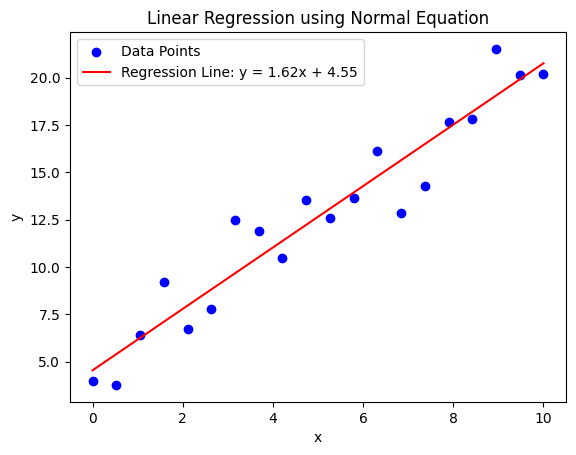

Regression Coefficients (Normal Equation): [4.54913327 1.62165392]
Regression Coefficients (Least Squares): [4.54913327 1.62165392]


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data (y = 2x + 3 + noise)
np.random.seed(42)
x = np.linspace(0, 10, 20)  # Independent variable
y = 2 * x + 3 + np.random.normal(0, 2, size=len(x))  # Add some noise

# Reshape x for matrix operations
X = np.column_stack((np.ones(len(x)), x))  # Add bias term (column of ones)

# Compute regression coefficients using the Normal Equation
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Predicted values using the model
y_pred = X @ beta

# Plot the data and regression line
plt.scatter(x, y, label="Data Points", color="blue")
plt.plot(x, y_pred, label=f"Regression Line: y = {beta[1]:.2f}x + {beta[0]:.2f}", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression using Normal Equation")
plt.show()

# Verify using NumPy's built-in least squares function
beta_ls, _, _, _ = np.linalg.lstsq(X, y, rcond=None)

# Display results
print("Regression Coefficients (Normal Equation):", beta)
print("Regression Coefficients (Least Squares):", beta_ls)
